## Work
1. 請建立自己的deep neural network
2. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
3. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [3]:
import os
import keras
from keras.datasets import cifar10
from keras import optimizers


# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [4]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = cifar10.load_data()

In [5]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [7]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [8]:
"""
Compile 模型
"""
opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

c:\Users\wei-jyun\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 3s 12ms/step - loss: 1.8500 - accuracy: 0.3385 - val_loss: 1.7316 - val_accuracy: 0.3937
Epoch 2/500
196/196 [==============================] - 2s 9ms/step - loss: 1.6410 - accuracy: 0.4157 - val_loss: 1.5930 - val_accuracy: 0.4312
Epoch 3/500
196/196 [==============================] - 2s 9ms/step - loss: 1.5543 - accuracy: 0.4503 - val_loss: 1.8868 - val_accuracy: 0.3714
Epoch 4/500
196/196 [==============================] - 2s 9ms/step - loss: 1.4906 - accuracy: 0.4736 - val_loss: 1.5276 - val_accuracy: 0.4449
Epoch 5/500
196/196 [==============================] - 2s 9ms/step - loss: 1.4388 - accuracy: 0.4884 - val_loss: 1.4531 - val_accuracy: 0.4854
Epoch 6/500
196/196 [==============================] - 2s 9ms/step - loss: 1.3961 - accuracy: 0.5044 - val_loss: 1.4870 - val_accuracy: 0.4703
Epoch 7/500
196/196 [==============================] - 2s 10ms/step - loss: 1.3591 - accuracy: 0.5185 - val_loss: 1.4623 - val_accuracy: 0.47

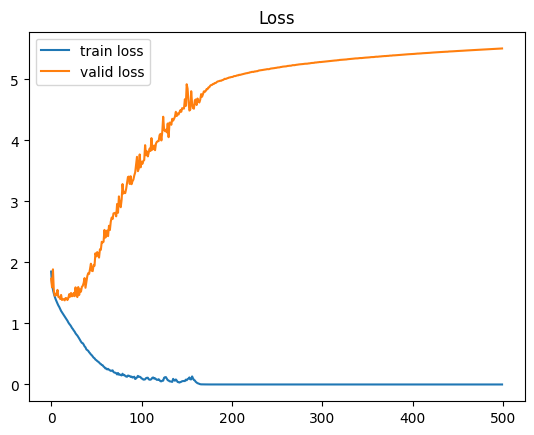

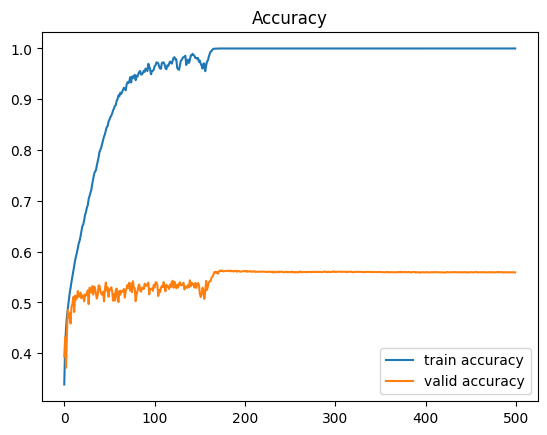

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()